In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import platform
import pathlib

In [2]:
## Paths Input Here
analysis = '1_way_manova/baseline_vs_memnet_correl_vs_outcome'
if platform.uname().system == 'Darwin': #------------------------------Mac OS X---------------------------------------------------------------
    conn_path = r'/Users/cu135/Dropbox (Partners HealthCare)/memory/analyses/composite_analyses/non_fl_vta_memory_derivatives/ferguson_memory_derivatives_with_clinical_data.csv'
    clin_path = r'/Users/cu135/Dropbox (Partners HealthCare)/memory/patient_data/AD_Clinical_Data_CDR_ADAS_COG_13.xlsx'
    # clin_path = 'path to clinical values'
    out_dir = os.path.join(os.path.dirname(conn_path), f'{analysis}')
    print('I will save to:', out_dir)
    x_roi_names = r'/Users/cu135/Dropbox (Partners HealthCare)/memory/analyses/roi-roi_correl/matrix_corrMx_names.csv'
    #roi_names = '<path to roi name location>'
    print('I have set pathnames in the Mac style')
else: #----------------------------------------------------------------Windows----------------------------------------------------------------
    conn_path = r'C:\Users\calvin.howard\Dropbox (Partners HealthCare)\memory\analyses\roi-roi_correl\matrix_corrMx_AvgR.csv'
    clin_path = r'C:\Users\calvin.howard\Dropbox (Partners HealthCare)\memory\patient_data\AD_Clinical_Data_CDR_ADAS_COG_13.xlsx'
    # clin_path = 'path to clinical values'
    out_dir = r'C:\Users\calvin.howard\Dropbox (Partners HealthCare)\memory\analyses\roi-roi_correl\stats'
    #out_dir = r'path to out dir here'
    x_roi_names = r'C:\Users\calvin.howard\Dropbox (Partners HealthCare)\memory\analyses\roi-roi_correl\matrix_corrMx_names.csv'
    #roi_names = '<path to roi name location>'
    print('I have set pathnames in the Windows style')
    
## Do you want to save the reults?
save = True
if save:
    if os.path.exists(out_dir) != True:
        os.makedirs(out_dir)

I will save to: //Users/cu135/Dropbox (Partners HealthCare)/memory/analyses/composite_analyses/non_fl_vta_memory_derivatives/1_way_manova/baseline_vs_memnet_correl_vs_outcome
I have set pathnames in the Mac style


## Begin Import

In [3]:
variables_to_change = {}
variables_to_change['original'] = [
    '% Change from baseline (ADAS-Cog11)'
  
    ]
variables_to_change['destination'] = [
    'percent_change_adascog11'
    
    ]
#----------------------------------------------------------------user input above----------------------------------------------------------------

In [5]:
data_df = pd.read_csv(conn_path)

#Prepare the dataframe for statsmodels
data_df = data_df.reset_index(drop=True)
#Drop NANs
data_df.dropna(inplace=True)

try:
    data_df.pop('Unnamed: 0')
except:
    print('none to pop')

#Rename variables to prevent errors
data_df = data_df.rename(columns={variables_to_change['original'][0]: variables_to_change['destination'][0]})#, '07_default': 'default', '02_somatomotor_seed': 'somatomotor', '03_dorsal_attention': 'dorsal', '01_visual_seed': 'visual', '04_ventral_attention': 'ventral', '05_limbic': 'limbic', '06_frontoparietal': 'frontoparietal'})
# #Organize variables
# data_df.sort_values

#Organize the coluns
import natsort
natsorted_columns = natsort.natsorted(data_df.columns)
data_df = data_df.reindex(columns=natsorted_columns)

#place response column at start of dataframe
response_series = data_df.pop(variables_to_change['destination'][0])
data_df.insert(0, variables_to_change['destination'][0], response_series)
display(data_df)

#Remove variables of low interest
# data_df.pop('SBC.')

,percent_change_adascog11,% Change from baseline (CDR),Age at DOS,Baseline ADAS-Cog11,Baseline CDR (sum of squares),Memory Network,"Patient # CDR, ADAS",Randomization Arm,Sensitivity Map ROI,Specificity Map,Subiculum ROI
0,-21.428571,-40.000000,62,28.0,5.0,0.414424,101,sham-stim,-14.873748,0.449273,56.864683
1,-36.363636,-69.230769,77,22.0,6.5,0.412365,102,stim-sham,-23.454599,0.438450,52.970984
2,-78.947368,-42.857143,76,19.0,7.0,0.496695,103,sham-stim,-20.611414,0.499521,62.459631
3,-129.411765,-71.428571,65,17.0,7.0,0.453563,104,stim-sham,-19.927919,0.434222,59.611631
5,-38.461538,-50.000000,66,13.0,3.0,0.518355,106,stim-sham,-14.782129,0.514507,63.323903
8,-30.434783,-44.444444,72,23.0,9.0,0.588857,109,sham-stim,-37.472323,0.516204,66.950749
9,-84.615385,-80.000000,72,13.0,5.0,0.657129,110,sham-stim,-22.957830,0.529024,69.267271
12,-60.000000,-100.000000,69,15.0,5.5,0.542925,113,stim-sham,-23.913161,0.497571,69.758721
13,-16.129032,0.000000,67,31.0,7.0,0.537553,114,sham-stim,-28.838985,0.462695,67.432125
15,-36.842105,-37.500000,67,19.0,4.0,0.526658,116,stim-sham,-17.743837,0.486751,61.952527


In [6]:
#Melt DF to prepare for MANOVA
df_to_melt = data_df.copy()

value_vars = ['Baseline ADAS-Cog11', 'Memory Network'] # set variables specifically
# value_vars = df_to_melt.columns.values.tolist()[1:]) # set all variables
melted_df = pd.melt(df_to_melt, id_vars=['percent_change_adascog11'], value_vars=value_vars)

display(melted_df)

,percent_change_adascog11,variable,value
0,-21.428571,Baseline ADAS-Cog11,28.000000
1,-36.363636,Baseline ADAS-Cog11,22.000000
2,-78.947368,Baseline ADAS-Cog11,19.000000
3,-129.411765,Baseline ADAS-Cog11,17.000000
4,-38.461538,Baseline ADAS-Cog11,13.000000
...,...,...,...
71,-54.545455,Memory Network,0.519374
72,-4.761905,Memory Network,0.592947
73,-207.692308,Memory Network,0.593380
74,-90.000000,Memory Network,0.575400


<AxesSubplot: xlabel='variable', ylabel='percent_change_adascog11'>

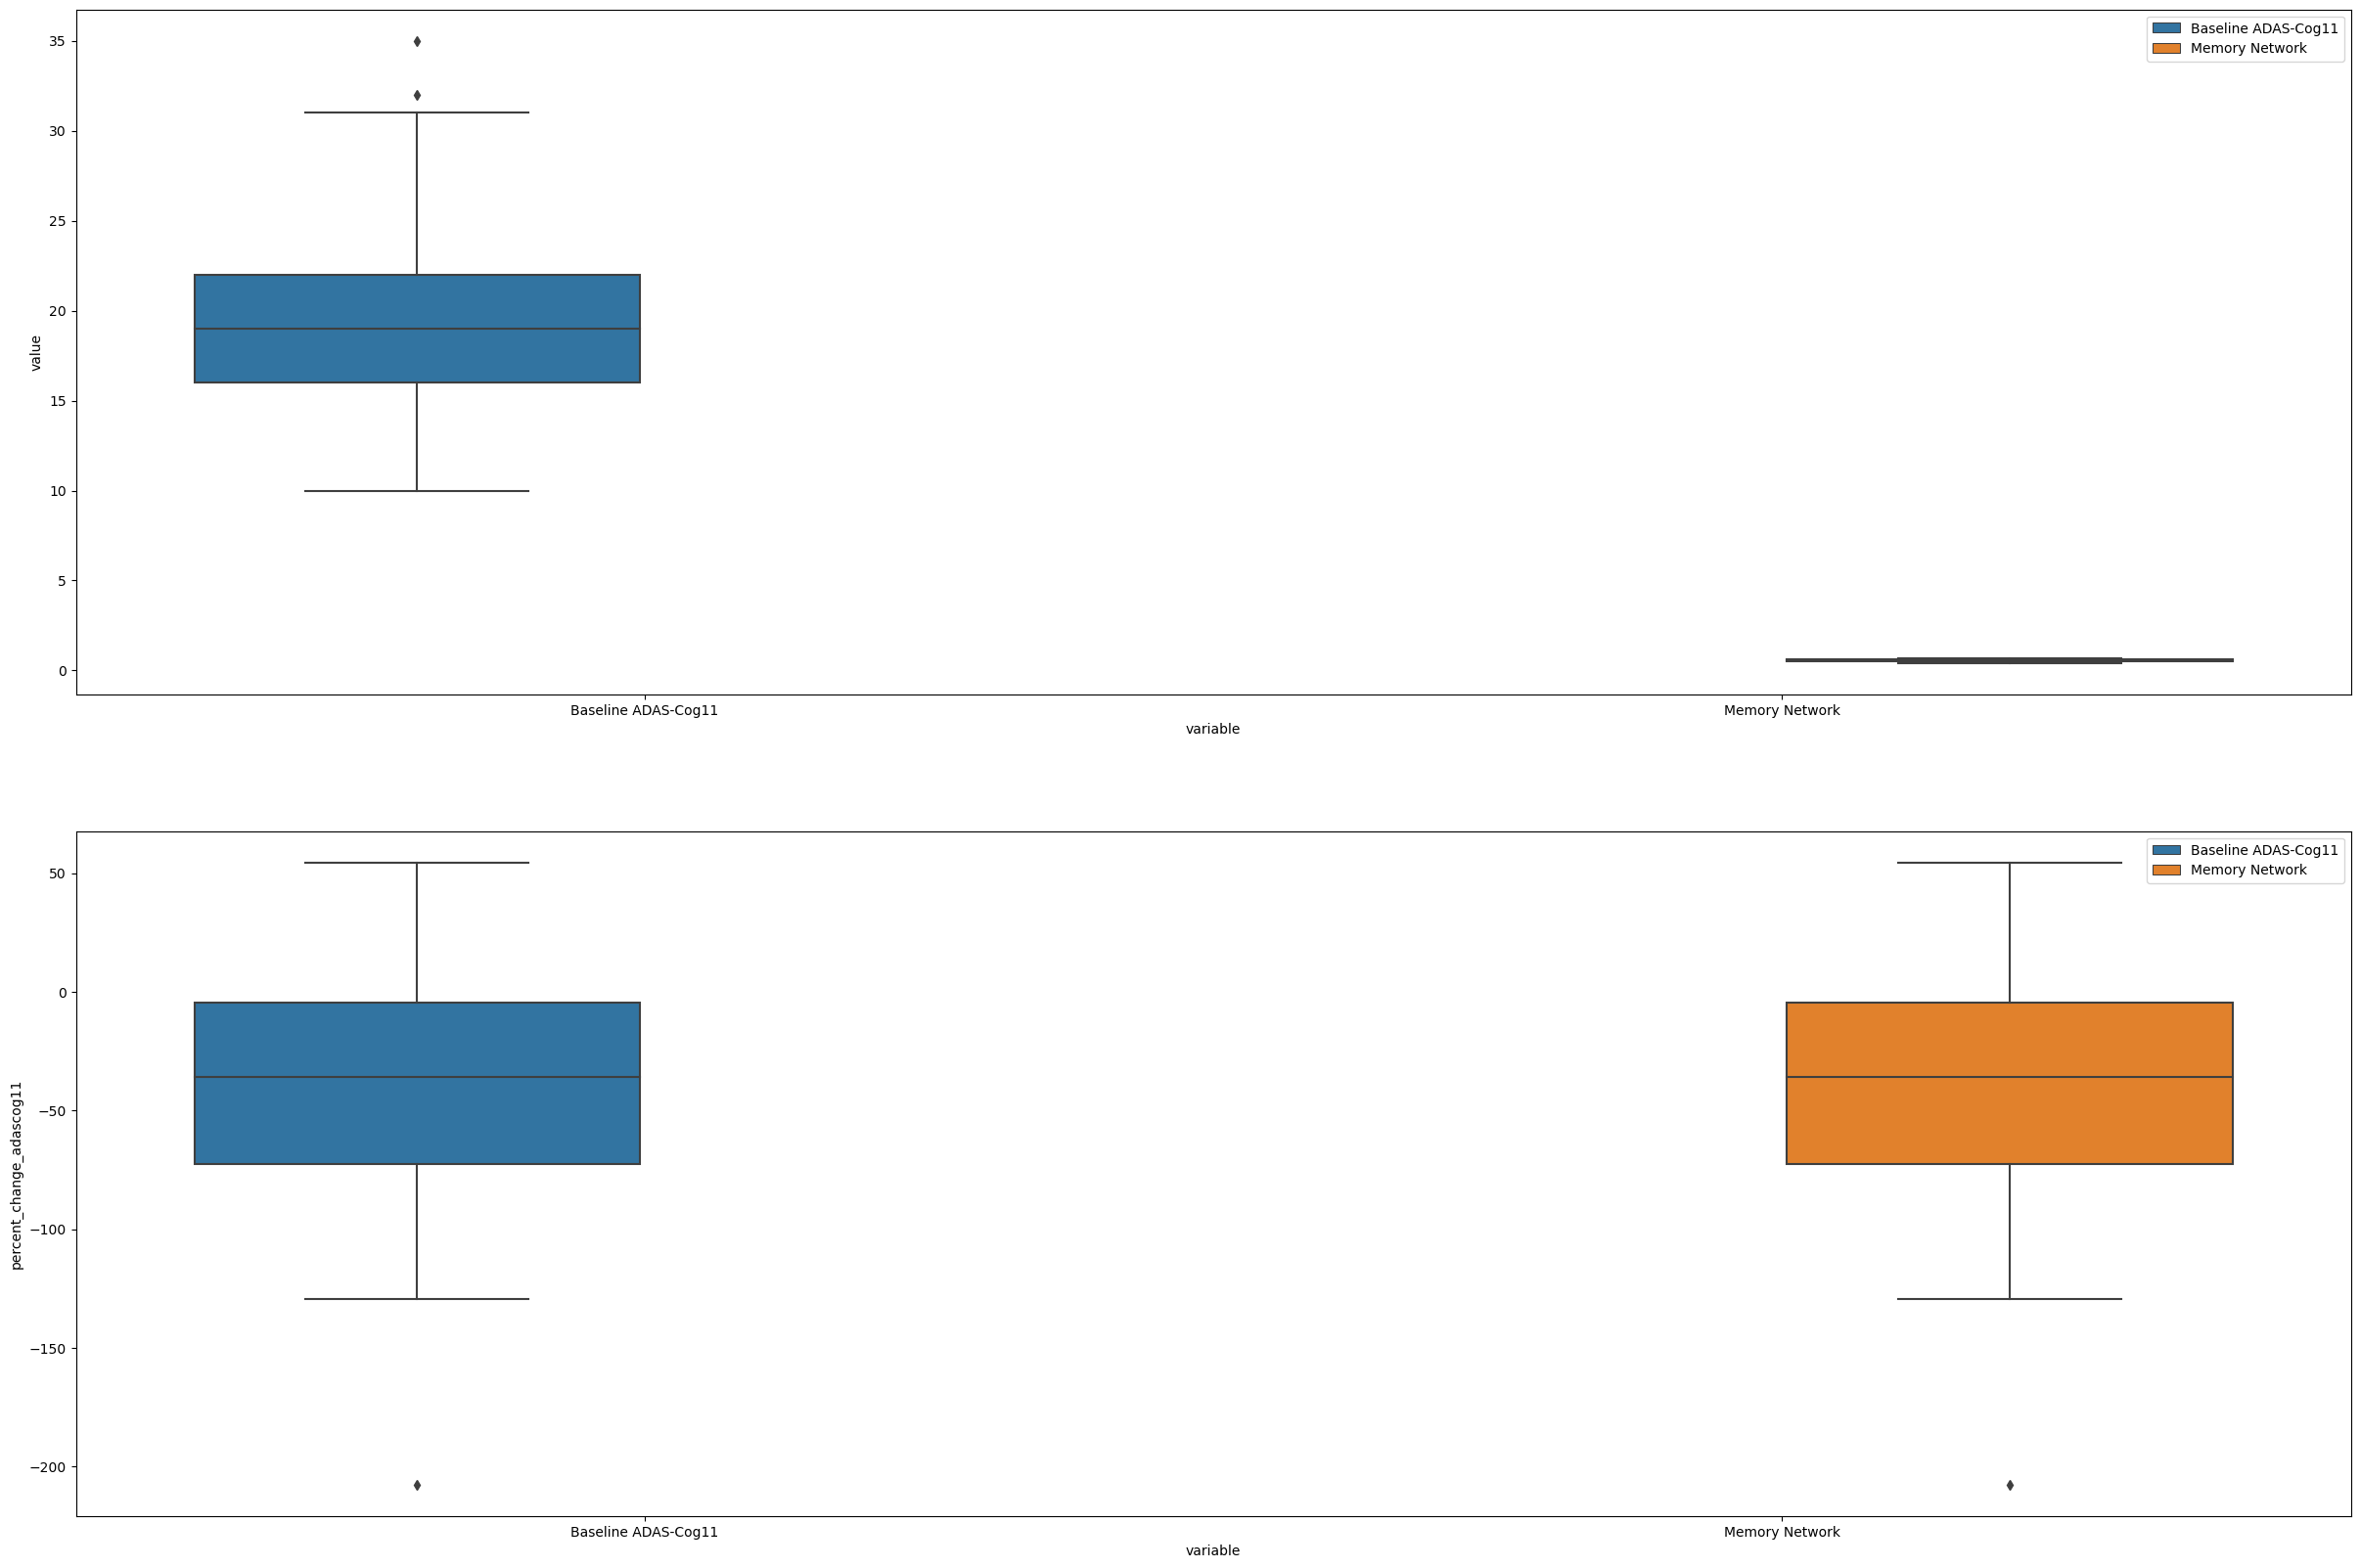

In [7]:
#Visualize
#Set colours
# color_list = ['#696969', '#BAB1B0', '#D3D3D3', '#D8D6D5']
# colors = []
# for i in range(0, len((melted_df['percent_change_adascog11'].unique()))):
#     colors.append(color_list[i])
# customPalette = sns.set_palette(sns.color_palette(colors))

fig, axs = plt.subplots(nrows=2, figsize=(30,20))
sns.boxplot(data=melted_df, x="variable", y="value", hue=melted_df['variable'].tolist(), ax=axs[0])#, palette=customPalette) 
sns.boxplot(data=melted_df, x="variable", y="percent_change_adascog11", hue=melted_df['variable'].tolist(), ax=axs[1])#, palette=customPalette) 

## Perform 1-Way MANOVA

In [16]:
from statsmodels.multivariate.manova import MANOVA
fit = MANOVA.from_formula('variable + value ~ percent_change_adascog11', data=melted_df)
print(fit.mv_test())

                                  Multivariate linear model
                                                                                             
---------------------------------------------------------------------------------------------
       Intercept                Value          Num DF  Den DF         F Value          Pr > F
---------------------------------------------------------------------------------------------
          Wilks' lambda                -0.0000 3.0000 72.0000 -108086391056891920.0000 1.0000
         Pillai's trace                 1.0000 3.0000 72.0000 -108086391056891936.0000 1.0000
 Hotelling-Lawley trace -4503599627370497.0000 3.0000 72.0000 -108086391056891920.0000 1.0000
    Roy's greatest root -4503599627370497.0000 3.0000 72.0000 -108086391056891936.0000 1.0000
---------------------------------------------------------------------------------------------
                                                                                             


## Posthoc Notes

if you are interested in how the groups influence a given dependent variable, run an ANOVA. 
if you are interested in how the linear combination of variables leads to maximal separability of the groups, run LDA. 
- IE, said conversely, if you are interested in seeing if a group has a disproportionate effect on the 'linear combination of variables', run LDA


## Posthoc with Statsmodels

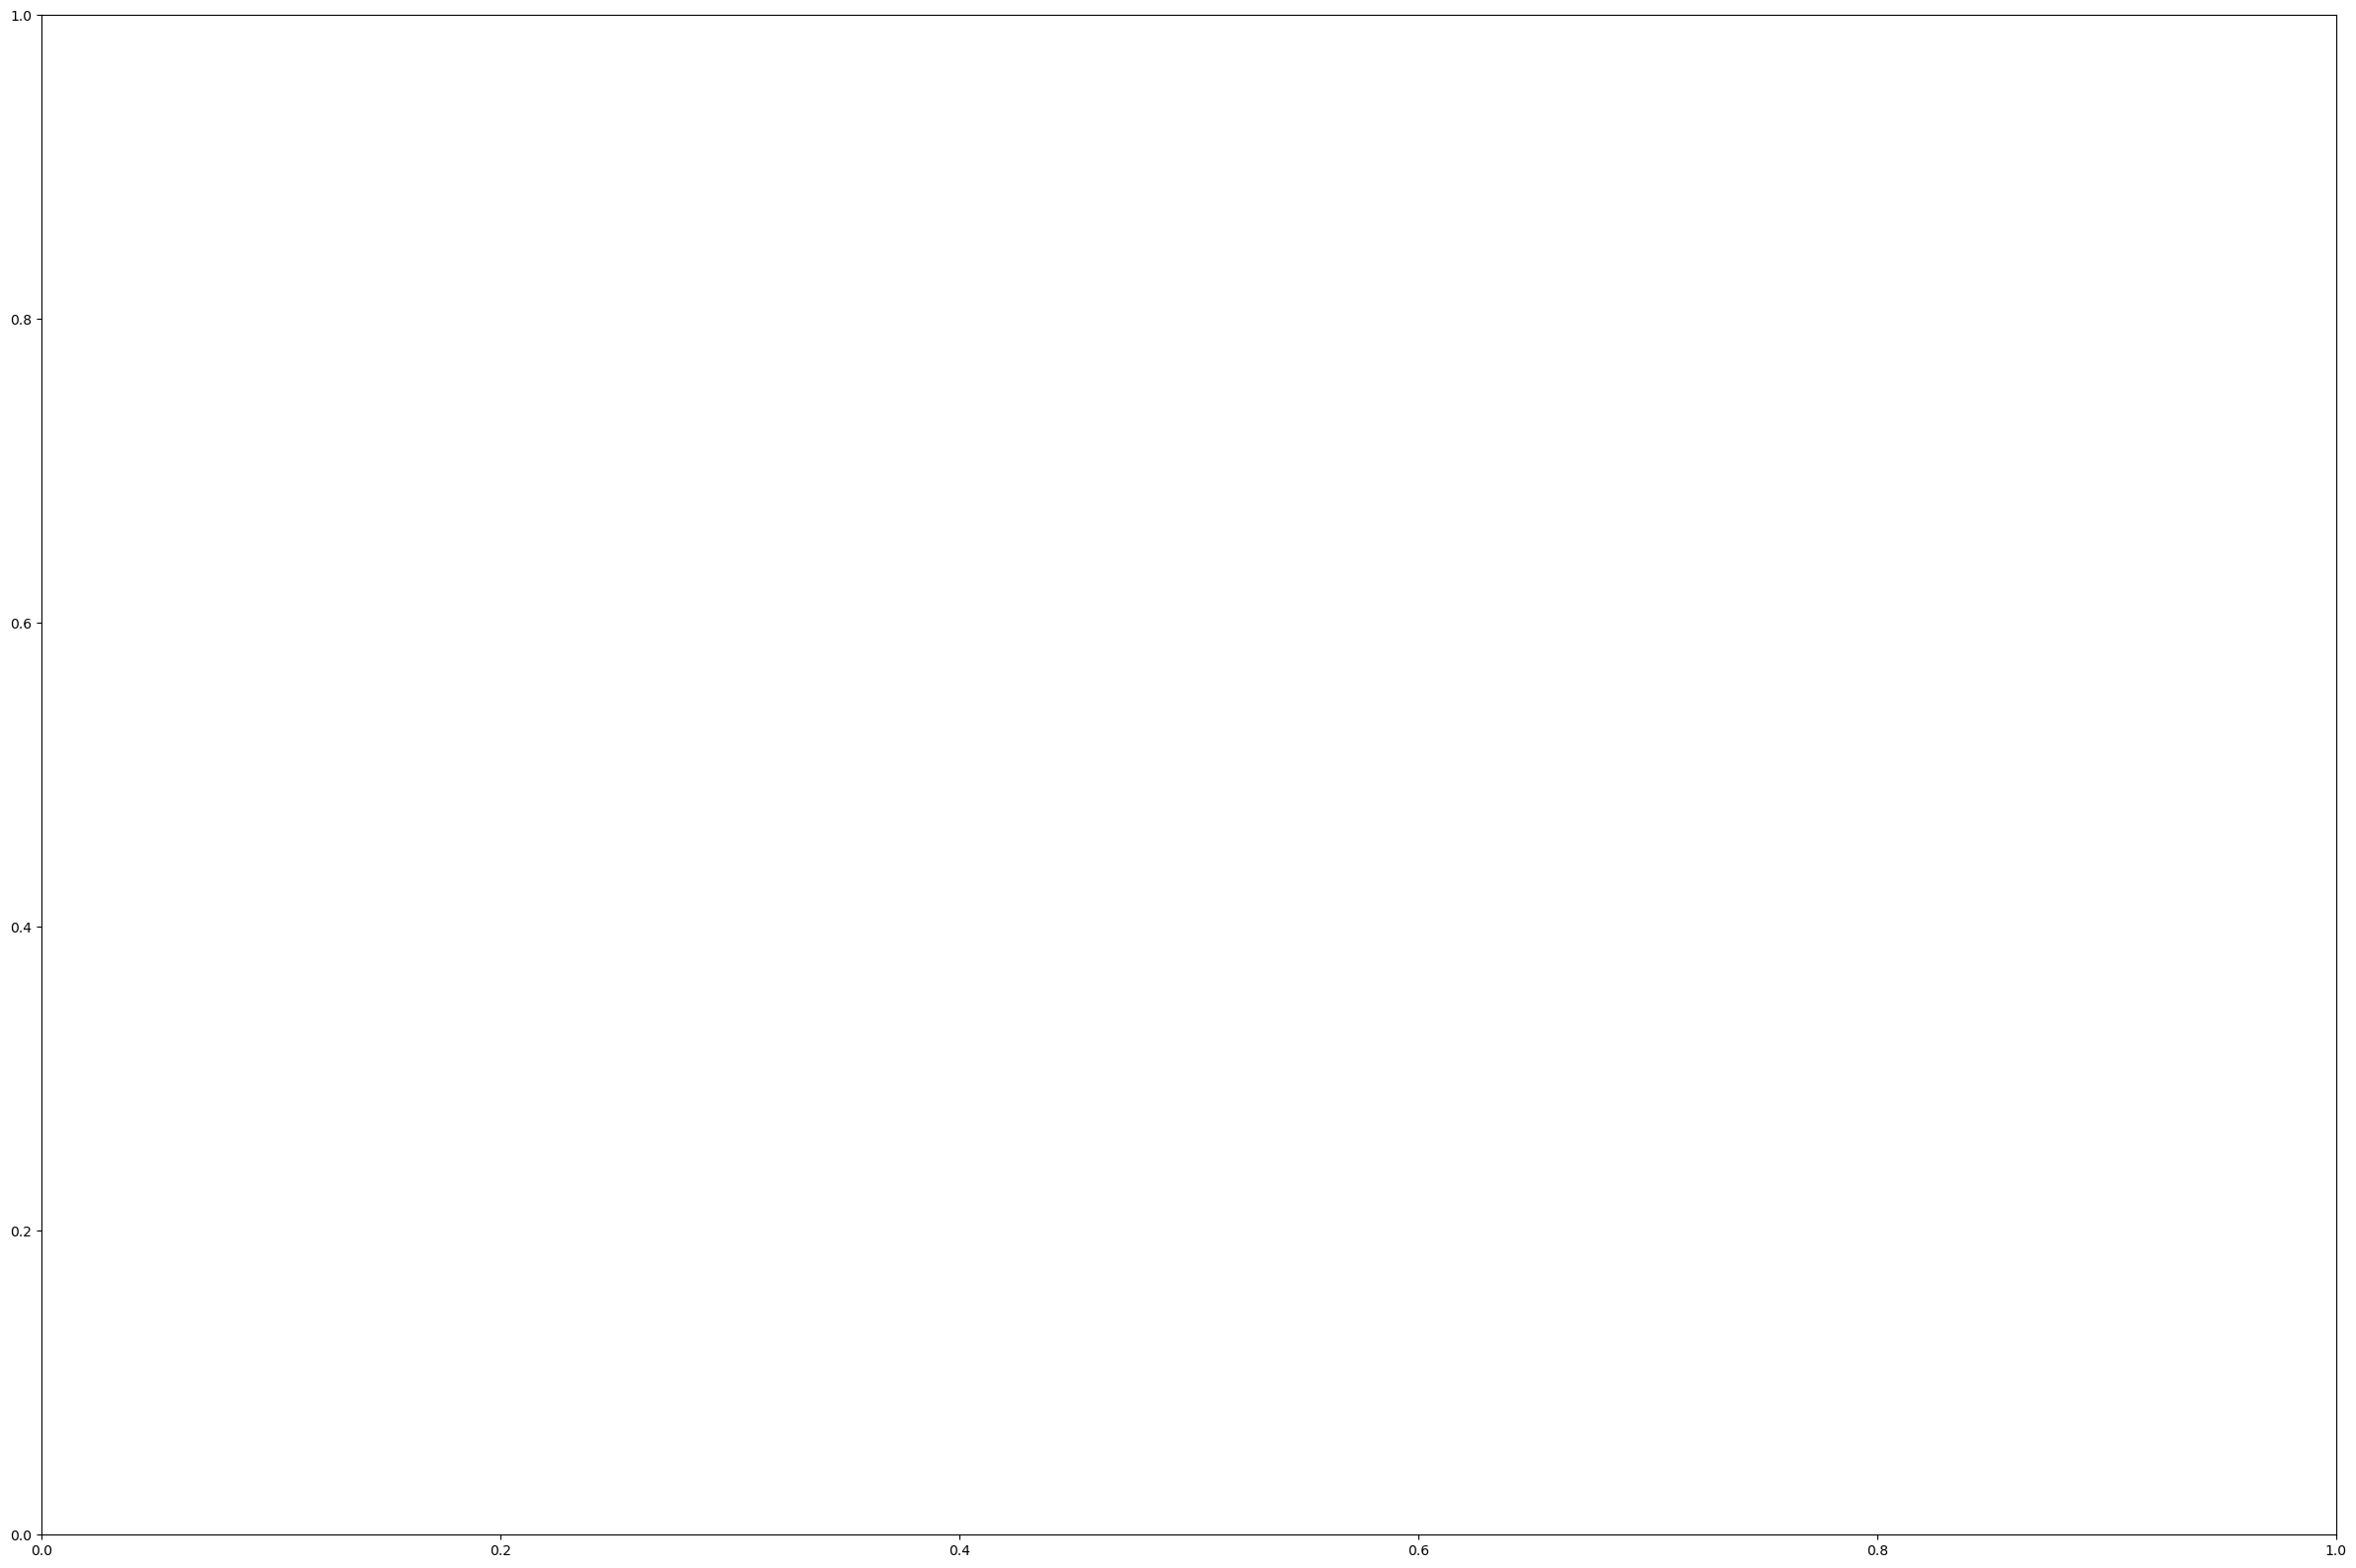

In [10]:
from scipy.stats import mannwhitneyu, normaltest, tukey_hsd, ttest_ind, kruskal, levene, brunnermunzel, wilcoxon
fig2, ax = plt.subplots(1,1, figsize=(30, 20))

main_tests = ['t-test_ind', 't-test_welch', 't-test_paired', 'Mann-Whitney', 'Mann-Whitney-gt', 'Mann-Whitney-ls', 'Levene', 'Wilcoxon', 'Kruskal', 'Brunner-Munzel']
post_hoc_tests = ['bonferroni', 'bonf', 'Bonferroni', 'holm-bonferroni', 'HB', 'Holm-Bonferroni', 'holm', 'benjamini-hochberg', 'BH', 'fdr_bh', 'Benjamini-Hochberg', 'fdr_by', 'Benjamini-Yekutieli', 'BY', None]

##----------------------------------------------------------------USER INPUT BELOW----------------------------------------------------------------
main_test = 't-test_ind'# #main_tests[0]
post_hoc_test = None #post_hoc_tests[3]

## Perform Post Hoc Analysis with LDA

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
#Fit the LDA
X = melted_df[["percent_change_adascog11", "value"]]
y = melted_df["variable"]
lda_model = lda()
lda_model.fit(X=X, y=y)

LinearDiscriminantAnalysis()

In [12]:
#Define methods to evaluate model
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(lda_model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))   



1.0


In [19]:
#Visualize Results
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
#Fit the LDA
X = melted_df[["percent_change_adascog11", "value"]]
y = melted_df["variable"]
lda_model = lda().fit(X=X, y=y).transform(X)
target_names = y

#create LDA plot
plt.figure()
lw = 2
for i, target_name in zip([0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21], target_names):
    plt.scatter(lda_model[y == i, 0], lda_model[y == i, 1], alpha=.8,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)

# # get Prior probabilities of groups:
# print('Prior: \n', lda_model.priors_)

# # get group means
# print('Means: \n', lda_model.means_)

# # get Coefficients of linear discriminants
# print('Scalings: \n', lda_model.scalings_)

# # get Proportion of trace (variance explained by each of the selected components)
# print('Explained Variance: \n', lda_model.explained_variance_ratio_)

# # plot 
# print(lda_model.transform(X))
# X_new = pd.DataFrame(lda_model.transform(X), columns=["lda1", "lda2"])
# X_new["variable"] = melted_df["variable"]
# sns.scatterplot(data=X_new, x="lda1", y="lda2", hue=melted_df['variable'].tolist())
# plt.show()

IndexError: index 1 is out of bounds for axis 1 with size 1

<Figure size 640x480 with 0 Axes>

In [31]:
# plot 
print(post_hoc.transform(X))
X_new = pd.DataFrame(post_hoc.transform(X), columns=["lda1", "lda2"])
X_new["variable"] = melted_df["variable"]
sns.scatterplot(data=X_new, x="lda1", y="lda2", hue=melted_df['variable'].tolist())
plt.show()

[[-8.50107950e-01]
 [-5.99238601e-01]
 [-5.56616564e-01]
 [-4.90635686e-01]
 [-4.79023790e-01]
 [-6.74355919e-01]
 [-4.94862502e-01]
 [-2.18804676e-01]
 [-3.59931875e-01]
 [-5.27865000e-01]
 [-8.52665981e-01]
 [-5.25961769e-01]
 [-6.24653465e-01]
 [-5.59973905e-01]
 [ 1.61337037e-01]
 [-4.33285023e-01]
 [-4.49604400e-01]
 [-4.27867777e-01]
 [-1.04254330e+00]
 [-9.24985455e-01]
 [-6.58264382e-01]
 [-3.59535637e-01]
 [ 1.86918827e-01]
 [-6.64080785e-02]
 [-1.63926426e-01]
 [-6.24317342e-01]
 [ 5.45678546e-02]
 [-1.65979429e-01]
 [-6.18716694e-01]
 [-6.20910559e-01]
 [-1.81305209e-01]
 [-4.32237919e-01]
 [-2.54011724e-01]
 [-3.24417300e-01]
 [ 1.40481496e-01]
 [-3.57680883e-01]
 [-6.17150531e-01]
 [-1.87687107e-01]
 [-5.60376360e-01]
 [ 3.63585477e-01]
 [-5.30352954e-01]
 [-9.49528029e-01]
 [ 1.14060524e-01]
 [-9.93248406e-01]
 [ 5.45236565e-01]
 [-4.86576103e-01]
 [-4.86791211e-01]
 [-3.52222925e-01]
 [-3.73803930e-01]
 [ 1.44134012e-01]
 [-8.15065164e-01]
 [-5.47940537e-01]
 [-5.1116722

ValueError: Shape of passed values is (900, 1), indices imply (900, 2)